# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/clasificacion_chistes.csv')

In [ ]:
df

,id,Chistes
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...
1,2008,Sabes por qué los hospitales tienen refrigerac...
2,2009,Cual es la fruta más chistosa? La naranjajajaj...
3,2010,Cuanta leche da la vaca en su vida? La misma q...
4,2011,when estornudas: A CHU
...,...,...
7990,9997,¿Qué le dijo una función exponencial a otra f...
7991,9998,¿Qué le dijo un número a otro número?\n No pu...
7992,9999,¿Por qué los libros de matemáticas están tris...
7993,10000,¿Qué hace un logaritmo en una fiesta?\n ¡Inte...


In [ ]:
df = df.drop(['nivel_risa', 'label'], axis=1)

In [ ]:
df.head()

,id,Chistes
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...
1,2008,Sabes por qué los hospitales tienen refrigerac...
2,2009,Cual es la fruta más chistosa? La naranjajajaj...
3,2010,Cuanta leche da la vaca en su vida? La misma q...
4,2011,when estornudas: A CHU


In [ ]:
stemmer = SnowballStemmer('spanish')
stop_words = set(stopwords.words('spanish'))

def normalize_and_tokenize(sentence):
    """
    Normalizes and tokenizes a given sentence by converting it to lowercase, removing special characters,
    and performing stemming on each token except stop words.

    Args:
        sentence (str): The sentence to normalize and tokenize.

    Returns:
        set: A set of processed tokens after normalization and stemming.
    """
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-záéíóúñü\s]', '', sentence)
    tokens = sentence.split()
    processed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return set(processed_tokens)

def sentence_similarity(sentence1, sentence2):
    """
    Calculates the similarity score between two sentences based on the Jaccard similarity of their token sets.

    Args:
        sentence1 (str): The first sentence for comparison.
        sentence2 (str): The second sentence for comparison.

    Returns:
        float: A similarity score between 0 and 1, where 1 means identical token sets.
    """

    tokens1 = normalize_and_tokenize(sentence1)
    tokens2 = normalize_and_tokenize(sentence2)

    common_tokens = len(tokens1.intersection(tokens2))

    max_length = max(len(tokens1), len(tokens2))

    if max_length == 0:
        return 0

    similarity_score = common_tokens / max_length
    return similarity_score

def comparar_df(df):
    """
    Compares each pair of sentences in a DataFrame, calculates their similarity, and stores results for pairs
    with similarity above 0.6.

    Args:
        df (DataFrame): A DataFrame containing sentences to compare.

    Returns:
        list of tuples: A list of tuples where each tuple contains IDs and sentences for pairs with similarity
                        above 0.6 and their similarity score.
    """

    num_sentences = len(df)
    similarity_results = []
    for i in range(num_sentences):
        for j in range(i + 1, num_sentences):
            sentence1 = df.iloc[i, 1]
            sentence2 = df.iloc[j, 1]
            similarity = sentence_similarity(sentence1, sentence2)
            if(similarity >= 0.6):
                similarity_results.append((df.iloc[i, 0], df.iloc[j, 0], df.iloc[i, 1], df.iloc[j, 1], similarity))


    return pd.DataFrame(similarity_results, columns=['Id1', 'Id2', 'Sentence1', 'Sentence2', 'Similarity'])

In [ ]:
prueba = df.iloc[0:500]
comparacion_1 = comparar_df(prueba)
comparacion_1

,Id1,Id2,Sentence1,Sentence2,Similarity
0,2045,2053,Hola cabrones hoy les voy a contar un chiste q...,Hola cabrones hoy les voy a contar un chiste q...,0.687500
1,2083,2336,Van dos y se cae el del medio,Van dos monjas en una moto y se cae la de el m...,0.666667
2,2301,2348,Esto di que va un barco a un muelle ¡y rebota!,Un barco que llega a un muelle y rebota.,0.600000


In [ ]:
prueba = df.iloc[500:1000]
comparacion_2 = comparar_df(prueba)
comparacion_2

,Id1,Id2,Sentence1,Sentence2,Similarity
0,2841,2956,Me cae mal la gente que usa palabras que no sa...,Odio a la gente que usa palabras que no saben ...,0.600000
1,2970,2974,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.625000
2,2970,2975,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.625000
3,2970,2982,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.625000
4,2974,2975,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.625000
5,2974,2982,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.625000
6,2975,2982,Insultos que tendrán más peso en generaciones ...,Insultos que tendrán más peso en generaciones ...,0.714286


In [ ]:
prueba = df.iloc[1000:1500]
comparacion_3 = comparar_df(prueba)
comparacion_3

,Id1,Id2,Sentence1,Sentence2,Similarity
0,3073,3074,4 pixeles,8 pixeles,1.000000
1,3088,3391,Cuál es el corte de pelo más caro? la quimiot...,Sabéis cual es el corte de pelo mas caro? La q...,0.666667
2,3091,3234,"Había una vez un perro llamado pegamento, se c...",Había una vez un perro que se llamaba pegament...,0.714286
3,3091,3249,"Había una vez un perro llamado pegamento, se c...","Había un perro que se llamaba chicle, se cayó ...",0.666667
4,3109,3249,Este era niño que se llamaba resistol se cayó ...,"Había un perro que se llamaba chicle, se cayó ...",0.600000
5,3121,3124,-¿Por qué se cayó el niño del columpio? -Porqu...,Por qué la niña se cayó del columpio -por que ...,0.857143
6,3130,3131,Habia una vez un pingüino llego otro y eran dos,Habia una vez un gato llego otro y eran dos,0.800000
7,3130,3132,Habia una vez un pingüino llego otro y eran dos,Habia una vez un perro llego otro y eran dos,0.800000
8,3131,3132,Habia una vez un gato llego otro y eran dos,Habia una vez un perro llego otro y eran dos,0.800000
9,3137,3207,令人震驚 (foto pixelada de chino),Pudín (foto pixelada),0.666667


In [ ]:
prueba = df.iloc[1500:2000]
comparacion_4 = comparar_df(prueba)
comparacion_4

,Id1,Id2,Sentence1,Sentence2,Similarity
0,3519,3592,¿Cuál es la diferencia entre un motor y un ino...,¿Cuál es la diferencia entre una moto y un ino...,0.857143
1,3596,3730,¿Qué le dice una impresora a otra? ¿Esta hoja ...,Que le dice una impresora a otra? Esa hoja es...,0.800000
2,3596,3799,¿Qué le dice una impresora a otra? ¿Esta hoja ...,¿Qué le dice una impresora a otra? Esta hoja e...,1.000000
3,3596,3894,¿Qué le dice una impresora a otra? ¿Esta hoja ...,Qué le dice una impresora a otra? Esa hoja es ...,1.000000
4,3598,3843,"Papá, papá... ¿qué se siente al tener un hijo ...","Papá, ¿qué se siente tener un hijo tan guapo? ...",0.888889
5,3704,4006,"Si pones ""xD"" al final de la frase suavizas el...","Si pones ""xD"" al final de la frase suavizas el...",0.909091
6,3705,3720,"Papá, ¿qué es una araña? +Un ser depredador y...","-Papá, ¿qué es una araña? +Un ser depredador ...",1.000000
7,3713,3719,—¿De qué trabajas? —Cazo dragones. —Pero si es...,—¿De qué trabajas? —Cazo dragones. —Pero si es...,1.000000
8,3730,3799,Que le dice una impresora a otra? Esa hoja es...,¿Qué le dice una impresora a otra? Esta hoja e...,0.800000
9,3730,3894,Que le dice una impresora a otra? Esa hoja es...,Qué le dice una impresora a otra? Esa hoja es ...,0.800000


In [ ]:
prueba = df.iloc[2000:2500]
comparacion_5 = comparar_df(prueba)
comparacion_5

,Id1,Id2,Sentence1,Sentence2,Similarity
0,4032,4234,¿Qué hace una abeja en el gimnasio? ¡Zum-ba!,¿Qué hace una abeja en el colegio? ¡Sus tareas...,0.600000
1,4032,4447,¿Qué hace una abeja en el gimnasio? ¡Zum-ba!,¿Qué hace una abeja en el gimnasio? ¡Zum-ba!,1.000000
2,4048,4053,¿Cómo se llama un perro que baila? Un perro-rí...,¿Cómo se llama un perro con chicles? ¡Gum-bark!,0.600000
3,4048,4069,¿Cómo se llama un perro que baila? Un perro-rí...,¿Cómo se llama un perro surfista? ¡Surf-dog!,0.600000
4,4048,4129,¿Cómo se llama un perro que baila? Un perro-rí...,¿Cómo se llama un perro travieso? ¡Perr-ocurre...,0.600000
5,4048,4196,¿Cómo se llama un perro que baila? Un perro-rí...,¿Cómo se llama una tableta que baila? ¡Bailale...,0.600000
6,4053,4069,¿Cómo se llama un perro con chicles? ¡Gum-bark!,¿Cómo se llama un perro surfista? ¡Surf-dog!,0.600000
7,4053,4129,¿Cómo se llama un perro con chicles? ¡Gum-bark!,¿Cómo se llama un perro travieso? ¡Perr-ocurre...,0.600000
8,4069,4129,¿Cómo se llama un perro surfista? ¡Surf-dog!,¿Cómo se llama un perro travieso? ¡Perr-ocurre...,0.600000
9,4087,4119,¿Cómo se llama un gato chef? ¡Mi-cooker!,¿Cómo se llama un gato elegante? ¡Gato-glamour!,0.600000


In [ ]:
prueba = df.iloc[2500:3000]
comparacion_6 = comparar_df(prueba)
comparacion_6

,Id1,Id2,Sentence1,Sentence2,Similarity
0,4527,4959,¿Cómo se despide un arroz? ¡Nos vemos en el su...,¿Cómo se despiden los músicos? Nos vemos en el...,0.600000
1,4584,4620,¿Por qué los jugadores de billar son buenos en...,¿Por qué los jugadores de billar son buenos en...,0.666667
2,4635,5004,¿Cómo se llama el pez más viajero? El peZegui.,¿Cómo se llama el pez más musical? El pez-ado.,0.600000
3,4637,4654,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué las estrellas no viajan en tren? Porq...,0.800000
4,4637,4676,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué los músicos no viajan en tren? Porque...,0.600000
5,4637,4682,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué los payasos no viajan en tren? Porque...,0.600000
6,4637,4712,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué las estrellas no viajan en tren? Porq...,0.666667
7,4637,4718,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué los canguros no viajan en tren? Porqu...,0.600000
8,4637,4726,¿Por qué los astrónomos no viajan en tren? Por...,¿Por qué los caballos no viajan en tren? Porqu...,0.600000
9,4641,4711,¿Qué hace un cóndor en el aeropuerto? Espera s...,¿Qué hace un pato en el aeropuerto? Espera su ...,0.666667


In [ ]:
prueba = df.iloc[3000:3500]
comparacion_7 = comparar_df(prueba)
comparacion_7

,Id1,Id2,Sentence1,Sentence2,Similarity
0,5072,5341,¿Cuál es el animal favorito de los pintores? ¡...,¿Cuál es el animal favorito de los hechiceros?...,0.6
1,5108,5312,¿Cómo se despiden los pintores? ¡Hasta el próx...,¿Cómo se despiden los cromosomas? ¡Hasta la pr...,0.6
2,5108,5409,¿Cómo se despiden los pintores? ¡Hasta el próx...,¿Cómo se despiden las hadas? ¡Hasta la próxima...,0.6
3,5312,5409,¿Cómo se despiden los cromosomas? ¡Hasta la pr...,¿Cómo se despiden las hadas? ¡Hasta la próxima...,0.6
4,5467,5482,¿Qué hace Iron Man antes de una carrera? ¡Hier...,¿Qué hace Iron Man en su jardín? Hierro-arbolado.,0.6
5,5467,5494,¿Qué hace Iron Man antes de una carrera? ¡Hier...,¿Qué hace Iron Man en el gimnasio? Hierro-pesas.,0.6
6,5482,5494,¿Qué hace Iron Man en su jardín? Hierro-arbolado.,¿Qué hace Iron Man en el gimnasio? Hierro-pesas.,0.6


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
prueba = df.iloc[3500:4000]
comparacion_8 = comparar_df(prueba)
comparacion_8

,Id1,Id2,Sentence1,Sentence2,Similarity
0,5539,5554,¿Cuál es el videojuego favorito de los carpint...,¿Cuál es el videojuego favorito de las arañas?...,0.600000
1,5539,5560,¿Cuál es el videojuego favorito de los carpint...,¿Cuál es el videojuego favorito de un caracol?...,0.600000
2,5539,5960,¿Cuál es el videojuego favorito de los carpint...,¿Cuál es el videojuego favorito de las arañas?...,0.600000
3,5554,5560,¿Cuál es el videojuego favorito de las arañas?...,¿Cuál es el videojuego favorito de un caracol?...,0.600000
4,5554,5960,¿Cuál es el videojuego favorito de las arañas?...,¿Cuál es el videojuego favorito de las arañas?...,0.800000
5,5560,5960,¿Cuál es el videojuego favorito de un caracol?...,¿Cuál es el videojuego favorito de las arañas?...,0.600000
6,5648,5682,¿Cuál es la bebida favorita de un robot? ¡La l...,¿Cuál es el día favorito de un robot? ¡El día ...,0.600000
7,5648,5705,¿Cuál es la bebida favorita de un robot? ¡La l...,¿Cuál es la película favorita de un robot? ¡Te...,0.600000
8,5654,5719,¿Qué hace un robot al descubrir algo nuevo? ¡H...,¿Qué hace un robot cuando olvida algo? ¡Restau...,0.666667
9,5668,5681,¿Qué dice un robot cuando termina de trabajar?...,¿Qué dice un robot cuando se despierta? ¡Boot ...,0.600000


In [ ]:
prueba = df.iloc[4000:4500]
comparacion_9 = comparar_df(prueba)
comparacion_9

,Id1,Id2,Sentence1,Sentence2,Similarity
0,6066,6101,- No sé si conseguiré enamorar a esa chica...\...,- No sé si conseguiré enamorar a esa chica...\...,1.000000
1,6069,6306,-¿A qué te dedicas?\n- Básicamente a respirar....,-¿A qué te dedicas? \n- Básicamente a respirar...,1.000000
2,6097,6450,Los feligreses en la iglesia y el padre comien...,- Hermanos: hoy vamos a hablar de la mentira y...,0.727273
3,6145,6207,- Tu rezas antes de comer.\n- No señor. Mi mad...,"- ¿Tú rezas antes de comer? \n- No, señor. Mi ...",1.000000
4,6296,6402,Dos tíos están jugando al golf cuando uno de e...,"John y Philip juegan al golf,\nJohn le da con ...",0.607143
5,6381,6500,"- Perdone, ¿es aquí el examen de jardinería?\n...","- Hola, ¿son aquí los exámenes de Jardinería?\...",0.600000
6,6424,6503,"- Mamá, ¿qué haces en frente del ordenador con...","- Mamá, ¿qué haces en frente de la computadora...",0.727273


In [ ]:
prueba = df.iloc[4500:5000]
comparacion_10 = comparar_df(prueba)
comparacion_10

,Id1,Id2,Sentence1,Sentence2,Similarity
0,6507,6719,"- Hola buenas, venia a pedir la mano de su hij...",El novio al padre de la novia.\n- ¡Venía a ped...,0.700000
1,6515,6929,Un hombre llama por teléfono a un manicomio y ...,Un hombre llama por teléfono a un manicomio y ...,0.714286
2,6558,6977,"- Dígame, ¿cuál es el motivo por el que quiere...",- Dígame. ¿Cuál es el motivo por el quiere div...,1.000000
3,6583,6948,Un niño le pregunta al otro:\n- ¿Qué vas a ped...,Un niño le pregunta al otro:\n- ¿Qué vas a ped...,0.925926
4,6584,6950,- Papá... ¿qué es el amor?\n- Es la luz de la ...,- Papá... ¿qué es el amor?\n- Es la luz de la ...,1.000000
5,6635,6775,- ¿Por qué las focas del circo miran siempre h...,- ¿Por qué las focas miran hacia arriba en los...,0.666667
6,6683,6684,Un veterinario va a un medico amigo suyo porqu...,Un veterinario va a un medico amigo suyo porqu...,1.000000


In [ ]:
prueba = df.iloc[5000:5500]
comparacion_11 = comparar_df(prueba)
comparacion_11

,Id1,Id2,Sentence1,Sentence2,Similarity
0,7083,7206,"- Mamá, mamá... Cuando haces el amor con papá,...","- Mamá, cuando terminas de hacer el amor con p...",0.666667
1,7116,7204,Llega Jaimito a la escuela y la maestra le dic...,Llega Jaimito a la escuela y la maestra le dic...,1.000000
2,7155,7156,- Se abre el telón y aparecen dos monjas entre...,- Se abre el telón y aparece una monja en llam...,0.727273
3,7155,7287,- Se abre el telón y aparecen dos monjas entre...,Se abre el telon :\nAparecen 13 caballos\nSe c...,0.636364
4,7156,7287,- Se abre el telón y aparece una monja en llam...,Se abre el telon :\nAparecen 13 caballos\nSe c...,0.636364
5,7156,7349,- Se abre el telón y aparece una monja en llam...,Se abre el telón y aparece un culo muy grande ...,0.600000
6,7195,7254,"- Señor, usted es bizco\n- No, lo que pasa es ...","- Señor, usted está vizco \n- No, lo que pasa ...",0.888889
7,7277,7368,"Llega un nuevo profesor a la universidad, traj...","Llega un nuevo profesor a la universidad, traj...",0.980000
8,7332,7398,Jaimito llama a la profesora a las 2:30 de la ...,Jaimito llama a la profesora a las 2:30 de la ...,1.000000


In [ ]:
prueba = df.iloc[5500:6000]
comparacion_12 = comparar_df(prueba)
comparacion_12

,Id1,Id2,Sentence1,Sentence2,Similarity
0,7540,7541,Un niño le pregunta a su abuelo:\n-Abuelo. ¿Có...,Un niño le pregunta a su abuelo:\n-Abuelo. ¿Có...,1.000000
1,7550,7803,¿Qué hace un lepero con un sobre de ketchup en...,¿Qué hace una persona con un sobre de mayonesa...,0.666667
2,7629,7825,"Dos borrachos que se acuestan en una litera, y...",Era una vez dos borrachos que se acuestan en u...,0.916667
3,7641,7946,Dos borrachos en la via del tren andando le di...,"Esto son dos borrachos, muy borrachos, que van...",0.769231
4,7889,7968,"Maestra: - Pepito, ¿como se llama el compuesto...","Maestra: Pepito, ¿como se llama el compuesto \...",1.000000
5,7977,7992,Se encuentran dos tíos y uno le dice al otro:\...,Se encuentran dos tíos y uno le dice al otro:\...,1.000000
6,7982,8002,"Una mujer, cansada de que su marido llegue bor...",Harta de que su marido llegue borracho a casa ...,0.791667


In [ ]:
prueba = df.iloc[6000:6500]
comparacion_13 = comparar_df(prueba)
comparacion_13

,Id1,Id2,Sentence1,Sentence2,Similarity
0,8066,8305,"-Mamá, Mamá!!!…….que el papa se quiere tirar p...","- Mamá , mamá, ¡Papá está en el balcón y dice ...",0.615385
1,8114,8284,"Esto eran un médico, un ingeniero y un informá...","Esto eran un médico, un ingeniero y un informá...",1.000000
2,8464,8483,¿Cuál es la diferencia entre una pizza y un j...,¿Cuál es la diferencia entre un judío y una p...,1.000000
3,8479,8497,¿Cómo se llama un niño judío con cáncer?\n Un...,¿Cómo se llama un niño judío con cáncer?\n Ce...,0.833333


In [ ]:
prueba = df.iloc[6500:7000]
comparacion_14 = comparar_df(prueba)
comparacion_14

,Id1,Id2,Sentence1,Sentence2,Similarity
0,8521,8586,¿Cuál es el mejor lugar para esconder un cadá...,¿Cuál es el mejor lugar para esconder un cadá...,0.666667
1,8529,8531,¿Por qué las feministas no pueden ir al espac...,¿Por qué las feministas no pueden ir a la pla...,0.625000
2,8530,8533,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
3,8530,8535,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
4,8530,8537,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
5,8533,8535,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
6,8533,8537,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
7,8535,8537,¿Cuál es el problema de las feministas con lo...,¿Cuál es el problema de las feministas con lo...,0.600000
8,8539,8871,¿Cuál es la diferencia entre una feminista y ...,¿Cuál es la diferencia entre un argentino y u...,0.875000
9,8543,8545,¿Cuál es la diferencia entre un gay y un sace...,¿Cuál es la diferencia entre un gay y un perr...,0.833333


In [ ]:
prueba = df.iloc[7000:7500]
comparacion_15 = comparar_df(prueba)
comparacion_15

,Id1,Id2,Sentence1,Sentence2,Similarity
0,9015,9091,"- Doctor, ¿qué puedo hacer para que este año ...","- Doctor, ¿qué puedo hacer para que este año ...",1.000000
1,9043,9155,- Mama que haces en frente de la computadora ...,"- Mamá, ¿qué haces en frente de la computador...",0.818182
2,9052,9140,"- Oye, ¿sabes cómo se llaman los habitantes d...","- Oye, ¿sabes cómo se llaman los habitantes d...",0.875000
3,9052,9227,"- Oye, ¿sabes cómo se llaman los habitantes d...","- Oye, ¿sabes cómo se llaman los habitantes d...",0.875000
4,9075,9371,Sabes por qué no se puede discutir con un DJ?...,¿Por qué no se puede discutir con un DJ?\n Po...,0.857143
5,9100,9394,- ¿Qué pasa si tiras un pato al agua?\n\n - N...,¿Qué pasa si tiras un pato al agua?\n Nada.\n,1.000000
6,9136,9318,"- Papa,papa ¿que se siente tener un hijo tan ...","Papá, ¿qué se siente al tener un hijo tan gua...",0.625000
7,9140,9227,"- Oye, ¿sabes cómo se llaman los habitantes d...","- Oye, ¿sabes cómo se llaman los habitantes d...",0.875000
8,9164,9393,- Cuál es el animal más viejo del mundo? \n\n...,¿Cuál es el animal más antiguo del mundo…?\n ...,0.625000
9,9164,9485,- Cuál es el animal más viejo del mundo? \n\n...,"¿Cuál es el animal más antiguo?\n La cebra , ...",0.625000


In [ ]:
prueba = df.iloc[7500:8000]
comparacion_16 = comparar_df(prueba)
comparacion_16

,Id1,Id2,Sentence1,Sentence2,Similarity
0,9540,9557,"¿Qué le dijo el pez al agua?\n ¡Sin ti, no so...",¿Qué le dijo un pez a otro pez?\n ¡Nada!\n,0.666667
1,9553,9568,¿Qué le dice un gusano a otro?\n Me voy a dar...,¿Qué le dijo un gusano a otro gusano?\n Voy a...,0.833333
2,9563,9999,¿Por qué el libro de matemáticas se cansó?\n ...,¿Por qué los libros de matemáticas están tris...,0.600000
3,9587,9614,¿Cuál es el colmo de un jardinero?\n Que su p...,¿Cuál es el colmo de un jardinero?\n Que siem...,0.625000
4,9587,9641,¿Cuál es el colmo de un jardinero?\n Que su p...,¿Cuál es el colmo de un jardinero?\n Que su h...,0.700000
...,...,...,...,...,...
89,9843,9988,¿Para que se invento el piano?\n Para que los...,¿Para qué sirve un piano?\n Para que los viol...,0.666667
90,9863,9942,¿Por qué el culturista trajo una escalera al ...,¿Por qué el asistente al gimnasio trajo una e...,0.875000
91,9873,9928,¿Qué le dijo un espejo de gimnasio al otro?\n...,¿Qué le dijo un ab al otro?\n ¡Me haces reir!\n,0.600000
92,9963,9965,¿Qué hace un economista?\n Mucho en el corto ...,¿Que hace un economista?\n Mucho en el corto ...,0.833333


## Revisión manual

Cada linea es un grupo de chistes (id) que son repetidos


2045 2053

2301 2348

2083 2336

2841 2956

3073 3074

3088 3391

3091 3249 3234 3109

3121 3124

3130 3131 3132

3184 3185 3208 3185

3233 3283 3186

3210	 3211

3250 3251

3258 3261

3315 3366

3519 3592

3596 3730 3799 3894

3598 3843

3704 4006

3705 3720

3713 3719

3748 3989

3757 3990

3769 4005

3775 4003

3778 4002

3779 4001

3783 4000

3784 3999

3785 3998

3786 3997

3787 3995

3788 3994

3790 3993

3791 3992

3793 3991

4332 4335

4032 4447

4032 4234

4370 4390

4654 4712

4658 4676

5554 5960

6066 6101

6069 6306

6097 6450

6145 6207

6296 6402

6381 6500

6424 6503

6558 6977

6584 6950

6683 6684

7116 7204

7332 7398

7083 7206

7155 7156

7195 7254

7277 7368

6507 6719

6515 6929

6583 6948

6635 6775

7540 7541

7550 7803

7629 7825

7641 7946

7889 7968

7977 7992

7982 8002

8464 8483

8114 8284

8066 8305

8553 8658

8557 8653

8567 8724  8584

3844 3848

8573 8577

8626 8671

3904 3956

8653 8758

3899 3942

4682 4704

4683 4717

4713 4721

4793 4799

8797 8802

8799 8803

8879 8883

8992 9000 9043 9155

9015 9091

9052 9140 9227

9075 9371

9100 9394

9136 9318

9176 9240 9348

9191 9228

9203 9340

9214 9487

9219 9357

9220 9352

9302 9330

9553 9568

9563 9999

9588 9672

9590 9609 9652 9718

9592 9662

9593 9623 9669 9683

9594 9638

9595 9671

9596 9673

9596 9689

9597 9656

9602 9674

9604 9694

9606 9658

9587 9641 9650 9702

9606 9670

9610 9696

9611 9697

9612 9698

9613 9642

9615 9688

9617 9653

9617 9717 9653

9618 9708

9620 9675

9620 9709

9621	9640

9624 9711

9626 9712

9629 9713

9630 9714

9631 9715

9632 9706

9633 9707

9636 9716

9645 9685

9647 9678

9649 9695

9654 9699

9655 9703

9673 9689

9675 9709

9681 9691

9843 9988

9863 9942

9963 9965

9191 9228

9203 9340

9214 9487

9219 9357

9220 9352

9240 9348

9302 9330

9303 9312

9303 9321

9308 9434

9312 9321

9313 9396 9462

9314 9381

9315 9343

9342 9450

9344 9472

9354 9390

9355 9418

9358 9478

9364 9447

9366 9420

9370 9488

9373 9442

9393 9485

9396 9462

9409 9473 9486

9413 9444

9428 9471

In [2]:
data = """
2045 2053
2301 2348
2083 2336
2841 2956
3073 3074
3088 3391
3091 3249 3234 3109
3121 3124
3130 3131 3132
3184 3185 3208 3185
3233 3283 3186
3210 3211
3250 3251
3258 3261
3315 3366
3519 3592
3596 3730 3799 3894
3598 3843
3704 4006
3705 3720
3713 3719
3748 3989
3757 3990
3769 4005
3775 4003
3778 4002
3779 4001
3783 4000
3784 3999
3785 3998
3786 3997
3787 3995
3788 3994
3790 3993
3791 3992
3793 3991
4332 4335
4032 4447
4032 4234
4370 4390
4654 4712
4658 4676
5554 5960
6066 6101
6069 6306
6097 6450
6145 6207
6296 6402
6381 6500
6424 6503
6558 6977
6584 6950
6683 6684
7116 7204
7332 7398
7083 7206
7155 7156
7195 7254
7277 7368
6507 6719
6515 6929
6583 6948
6635 6775
7540 7541
7550 7803
7629 7825
7641 7946
7889 7968
7977 7992
7982 8002
8464 8483
8114 8284
8066 8305
8553 8658
8557 8653
8567 8724  8584
3844 3848
8573 8577
8626 8671
3904 3956
8653 8758
3899 3942
4682 4704
4683 4717
4713 4721
4793 4799
8797 8802
8799 8803
8879 8883
8992 9000 9043 9155
9015 9091
9052 9140 9227
9075 9371
9100 9394
9136 9318
9176 9240 9348
9191 9228
9203 9340
9214 9487
9219 9357
9220 9352
9302 9330
9553 9568
9563 9999
9588 9672
9590 9609 9652 9718
9592 9662
9593 9623 9669 9683
9594 9638
9595 9671
9596 9673
9596 9689
9597 9656
9602 9674
9604 9694
9606 9658
9587 9641 9650 9702
9606 9670
9610 9696
9611 9697
9612 9698
9613 9642
9615 9688
9617 9653
9617 9717 9653
9618 9708
9620 9675
9620 9709
9621 9640
9624 9711
9626 9712
9629 9713
9630 9714
9631 9715
9632 9706
9633 9707
9636 9716
9645 9685
9647 9678
9649 9695
9654 9699
9655 9703
9673 9689
9675 9709
9681 9691
9843 9988
9863 9942
9963 9965
9191 9228
9203 9340
9214 9487
9219 9357
9220 9352
9240 9348
9302 9330
9303 9312
9303 9321
9308 9434
9312 9321
9313 9396 9462
9314 9381
9315 9343
9342 9450
9344 9472
9354 9390
9355 9418
9358 9478
9364 9447
9366 9420
9370 9488
9373 9442
9393 9485
9396 9462
9409 9473 9486
9413 9444
9428 9471
"""

# Parse the data to create the dictionary
data_dict = {}
for line in data.strip().split("\n"):
    numbers = list(map(int, line.split()))
    data_dict[numbers[0]] = numbers[1:]

data_dict

{2045: [2053],
 2301: [2348],
 2083: [2336],
 2841: [2956],
 3073: [3074],
 3088: [3391],
 3091: [3249, 3234, 3109],
 3121: [3124],
 3130: [3131, 3132],
 3184: [3185, 3208, 3185],
 3233: [3283, 3186],
 3210: [3211],
 3250: [3251],
 3258: [3261],
 3315: [3366],
 3519: [3592],
 3596: [3730, 3799, 3894],
 3598: [3843],
 3704: [4006],
 3705: [3720],
 3713: [3719],
 3748: [3989],
 3757: [3990],
 3769: [4005],
 3775: [4003],
 3778: [4002],
 3779: [4001],
 3783: [4000],
 3784: [3999],
 3785: [3998],
 3786: [3997],
 3787: [3995],
 3788: [3994],
 3790: [3993],
 3791: [3992],
 3793: [3991],
 4332: [4335],
 4032: [4234],
 4370: [4390],
 4654: [4712],
 4658: [4676],
 5554: [5960],
 6066: [6101],
 6069: [6306],
 6097: [6450],
 6145: [6207],
 6296: [6402],
 6381: [6500],
 6424: [6503],
 6558: [6977],
 6584: [6950],
 6683: [6684],
 7116: [7204],
 7332: [7398],
 7083: [7206],
 7155: [7156],
 7195: [7254],
 7277: [7368],
 6507: [6719],
 6515: [6929],
 6583: [6948],
 6635: [6775],
 7540: [7541],
 7550: 

In [3]:
unicos = []
for k,v in data_dict.items():
    for i in v:
        if i not in unicos:
            unicos.append(i)


In [4]:
len(unicos)

180

Estos son los ids que debemos eliminar

In [5]:
unicos

[2053,
 2348,
 2336,
 2956,
 3074,
 3391,
 3249,
 3234,
 3109,
 3124,
 3131,
 3132,
 3185,
 3208,
 3283,
 3186,
 3211,
 3251,
 3261,
 3366,
 3592,
 3730,
 3799,
 3894,
 3843,
 4006,
 3720,
 3719,
 3989,
 3990,
 4005,
 4003,
 4002,
 4001,
 4000,
 3999,
 3998,
 3997,
 3995,
 3994,
 3993,
 3992,
 3991,
 4335,
 4234,
 4390,
 4712,
 4676,
 5960,
 6101,
 6306,
 6450,
 6207,
 6402,
 6500,
 6503,
 6977,
 6950,
 6684,
 7204,
 7398,
 7206,
 7156,
 7254,
 7368,
 6719,
 6929,
 6948,
 6775,
 7541,
 7803,
 7825,
 7946,
 7968,
 7992,
 8002,
 8483,
 8284,
 8305,
 8658,
 8653,
 8724,
 8584,
 3848,
 8577,
 8671,
 3956,
 8758,
 3942,
 4704,
 4717,
 4721,
 4799,
 8802,
 8803,
 8883,
 9000,
 9043,
 9155,
 9091,
 9140,
 9227,
 9371,
 9394,
 9318,
 9240,
 9348,
 9228,
 9340,
 9487,
 9357,
 9352,
 9330,
 9568,
 9999,
 9672,
 9609,
 9652,
 9718,
 9662,
 9623,
 9669,
 9683,
 9638,
 9671,
 9689,
 9656,
 9674,
 9694,
 9670,
 9641,
 9650,
 9702,
 9696,
 9697,
 9698,
 9642,
 9688,
 9717,
 9653,
 9708,
 9709,
 9640,

In [ ]:
comparacion_global = comparar_df(df)
comparacion_global

Reemplazo duplicados

In [1]:
import os

# Cambia 'memes_tomas' a la ruta completa si la carpeta está en otro lugar
carpeta = 'data/reemplazo_duplicados'
# Lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Filtramos solo las imágenes (opcional si tienes otros tipos de archivos en la carpeta)
imagenes = [archivo for archivo in archivos if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Primera etapa: Renombramos cada imagen con un prefijo temporal "meme_#"
for i, imagen in enumerate(imagenes, start=2007):
    extension = os.path.splitext(imagen)[1]
    nuevo_nombre_temp = f"meme_{i}{extension}"
    ruta_original = os.path.join(carpeta, imagen)
    ruta_nueva_temp = os.path.join(carpeta, nuevo_nombre_temp)
    os.rename(ruta_original, ruta_nueva_temp)
    print(f"Renombrado temporal: {ruta_original} a {ruta_nueva_temp}")

# Segunda etapa: Renombramos de "meme_#" a solo el número "#"
archivos_temporales = os.listdir(carpeta)
imagenes_temporales = [archivo for archivo in archivos_temporales if archivo.startswith("meme_")]

for imagen_temp in imagenes_temporales:
    i = int(imagen_temp.split("_")[1].split(".")[0])  # Extraemos el número de la imagen temporal
    extension = os.path.splitext(imagen_temp)[1]
    nuevo_nombre_final = f"{i}{extension}"
    ruta_original_temp = os.path.join(carpeta, imagen_temp)
    ruta_nueva_final = os.path.join(carpeta, nuevo_nombre_final)
    os.rename(ruta_original_temp, ruta_nueva_final)
    print(f"Renombrado final: {ruta_original_temp} a {ruta_nueva_final}")

print("Renombrado completado.")


Renombrado temporal: data/reemplazo_duplicados\11WhatsApp Image 2024-11-03 at 03.26.56.jpeg a data/reemplazo_duplicados\meme_2007.jpeg
Renombrado temporal: data/reemplazo_duplicados\11WhatsApp Image 2024-11-03 at 03.50.04.jpeg a data/reemplazo_duplicados\meme_2008.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Image 2024-11-03 at 00.03.29.jpeg a data/reemplazo_duplicados\meme_2009.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Image 2024-11-03 at 00.03.30.jpeg a data/reemplazo_duplicados\meme_2010.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Image 2024-11-03 at 00.03.32.jpeg a data/reemplazo_duplicados\meme_2011.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Image 2024-11-03 at 00.03.33.jpeg a data/reemplazo_duplicados\meme_2012.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Image 2024-11-03 at 00.03.34.jpeg a data/reemplazo_duplicados\meme_2013.jpeg
Renombrado temporal: data/reemplazo_duplicados\1WhatsApp Ima

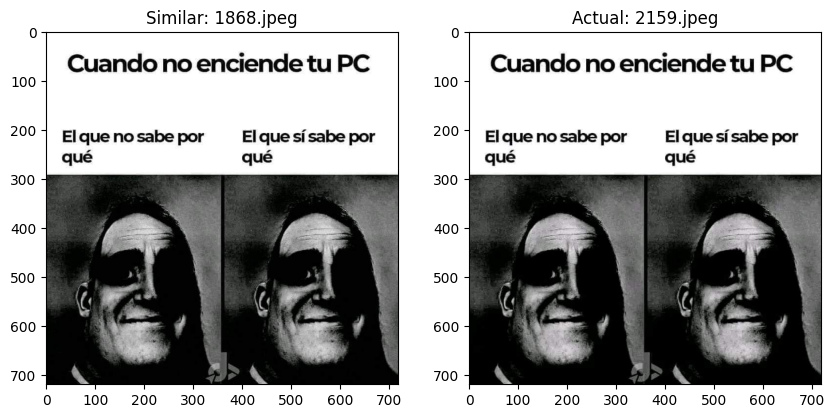

Imagen '2159.jpeg' eliminada.


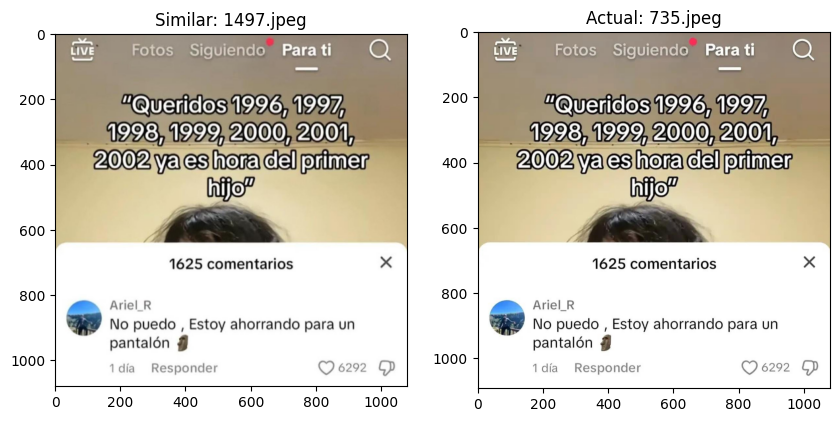

Imagen '735.jpeg' conservada.


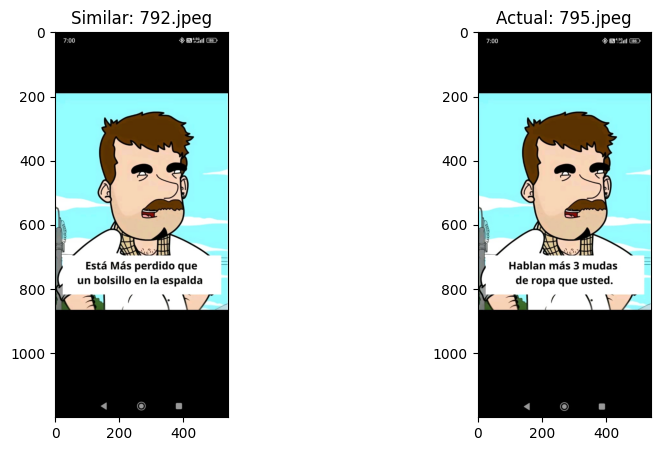

Imagen '795.jpeg' conservada.


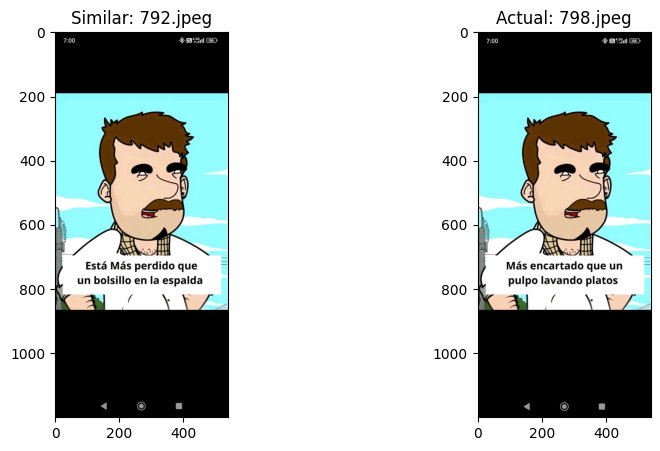

Imagen '798.jpeg' conservada.


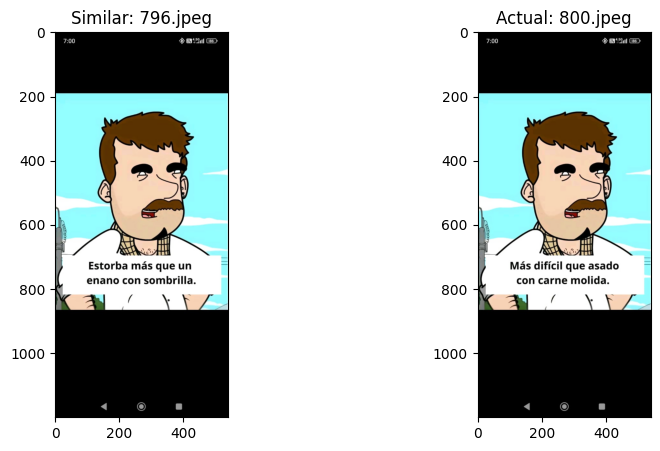

Imagen '800.jpeg' conservada.
Comparación completada.


In [3]:
from PIL import Image
import imagehash
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta de memes
carpeta = 'data/memes_conjuntos'

# Diccionario para almacenar los hashes
hash_dict = {}

# Recorre cada imagen en la carpeta
for filename in os.listdir(carpeta):
    ruta_imagen = os.path.join(carpeta, filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Carga la imagen y calcula su hash
        imagen = Image.open(ruta_imagen)
        hash_imagen = imagehash.phash(imagen)  # Usamos pHash para detectar similitudes
        
        # Verifica si el hash ya existe en el diccionario
        if hash_imagen in hash_dict:
            # Mostrar las imágenes similares
            imagen_similar = Image.open(os.path.join(carpeta, hash_dict[hash_imagen]))
            
            # Mostrar ambas imágenes para comparación
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(imagen_similar)
            axes[0].set_title(f"Similar: {hash_dict[hash_imagen]}")
            axes[1].imshow(imagen)
            axes[1].set_title(f"Actual: {filename}")
            plt.show()
            
            # Preguntar si se desea eliminar la imagen actual
            respuesta = input(f"¿Quieres eliminar la imagen '{filename}'? (s/n): ")
            if respuesta.lower() == 's':
                os.remove(ruta_imagen)
                print(f"Imagen '{filename}' eliminada.")
            else:
                print(f"Imagen '{filename}' conservada.")
        else:
            hash_dict[hash_imagen] = filename

print("Comparación completada.")


la imagen 1497 no la eliminamos debido a que la eliminaremos cuando todos ya hayan clasificado sus memes